In [429]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
%matplotlib inline

# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)
# from sklearn import preprocessing
# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
# file_id = 'REPLACE_WITH_YOUR_FILE_ID'
# downloaded = drive.CreateFile({'id': file_id})
# print('Downloaded content "{}"'.format(downloaded.GetContentString()))
from sklearn import datasets
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imblearn import over_sampling as os
from imblearn import pipeline as pl
from imblearn.metrics import classification_report_imbalanced
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn import preprocessing

In [430]:
# from google.colab import drive
# drive.mount('/content/gdrive')


In [431]:
df = pd.read_csv('../../data/example.csv')
df.head() 

,Unnamed: 0,loan_amnt,amount_diff_inv,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,...,delinq_2yrs_cat,inq_last_6mths_cat,open_acc,pub_rec,pub_rec_cat,acc_ratio,initial_list_status,loan_status,int_rate,target
0,0,8400,same,36,270.06,B,2.0,MORTGAGE,66000.0,Not Verified,...,n,y,7,0,n,0.318182,w,Fully Paid,9.75%,0
1,4,20000,same,36,664.20,C,10.0,MORTGAGE,49000.0,Source Verified,...,y,n,8,0,n,0.285714,w,Fully Paid,11.99%,0
2,5,13625,same,60,326.36,C,1.0,MORTGAGE,50000.0,Not Verified,...,n,n,21,0,n,0.291667,w,Fully Paid,15.31%,0
3,7,15000,same,60,393.50,D,1.0,RENT,63890.0,Not Verified,...,n,y,7,0,n,0.875000,w,Charged Off,19.53%,1
4,9,12000,same,60,277.18,C,10.0,MORTGAGE,68000.0,Source Verified,...,n,y,12,0,n,0.363636,w,Late (16-30 days),13.67%,0


In [432]:
# with open('/gdrive/foo.txt', 'w') as f:
#   f.write('Hello Google Drive!')
# !cat /gdrive/foo.txt

In [433]:
# le = preprocessing.LabelEncoder()
# df['amount_diff_inv'] = le.fit_transform(df['amount_diff_inv'])
# df['grade'] = le.fit_transform(df['grade'])
# df['home_ownership'] = le.fit_transform(df['home_ownership'])
# df['verification_status'] = le.fit_transform(df['verification_status'])
# df['purpose'] = le.fit_transform(df['purpose'])
# df['loan_status'] = le.fit_transform(df['loan_status'])
# df['initial_list_status'] = le.fit_transform(df['initial_list_status'])
# df['delinq_2yrs_cat'] = le.fit_transform(df['delinq_2yrs_cat'])
# df['inq_last_6mths_cat'] = le.fit_transform(df['inq_last_6mths_cat'])
# df['pub_rec_cat'] = le.fit_transform(df['pub_rec_cat'])


In [434]:
df = df.drop(df.columns[0], axis=1).head()


In [435]:
df['int_rate'] = df['int_rate'].str.split('%').str.get(0)
# df['int_rate']= pddf['int_rate'])

In [438]:
df.head()

,loan_amnt,amount_diff_inv,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,...,delinq_2yrs_cat,inq_last_6mths_cat,open_acc,pub_rec,pub_rec_cat,acc_ratio,initial_list_status,loan_status,int_rate,target
0,8400,same,36,270.06,B,2.0,MORTGAGE,66000.0,Not Verified,debt_consolidation,...,n,y,7,0,n,0.318182,w,Fully Paid,9.75,0
1,20000,same,36,664.20,C,10.0,MORTGAGE,49000.0,Source Verified,debt_consolidation,...,y,n,8,0,n,0.285714,w,Fully Paid,11.99,0
2,13625,same,60,326.36,C,1.0,MORTGAGE,50000.0,Not Verified,credit_card,...,n,n,21,0,n,0.291667,w,Fully Paid,15.31,0
3,15000,same,60,393.50,D,1.0,RENT,63890.0,Not Verified,debt_consolidation,...,n,y,7,0,n,0.875000,w,Charged Off,19.53,1
4,12000,same,60,277.18,C,10.0,MORTGAGE,68000.0,Source Verified,credit_card,...,n,y,12,0,n,0.363636,w,Late (16-30 days),13.67,0


In [439]:

# X_clean.head()
# X_clean['target'].head()
# df['target'].head()

In [440]:
le = preprocessing.LabelEncoder()
df['amount_diff_inv'] = le.fit_transform(df['amount_diff_inv'])
df['grade'] = le.fit_transform(df['grade'])
df['home_ownership'] = le.fit_transform(df['home_ownership'])
df['verification_status'] = le.fit_transform(df['verification_status'])
df['purpose'] = le.fit_transform(df['purpose'])
df['loan_status'] = le.fit_transform(df['loan_status'])
df['initial_list_status'] = le.fit_transform(df['initial_list_status'])
df['delinq_2yrs_cat'] = le.fit_transform(df['delinq_2yrs_cat'])
df['inq_last_6mths_cat'] = le.fit_transform(df['inq_last_6mths_cat'])
df['pub_rec_cat'] = le.fit_transform(df['pub_rec_cat'])


In [441]:
df['int_rate'] = pd.to_numeric(df['int_rate'])
# np.any(np.isnan(mat))
# np.all(np.isfinite(mat))




In [442]:
df.dropna(axis=0, how = 'any', inplace = True)


In [443]:
df.shape

(5, 21)

In [444]:
y = df['target']


In [445]:
y

0    0
1    0
2    0
3    1
4    0
Name: target, dtype: int64

In [446]:
df.drop(['loan_status', 'target'], axis=1, inplace=True)

In [447]:
df.isnull().any()

loan_amnt              False
amount_diff_inv        False
term                   False
installment            False
grade                  False
emp_length             False
home_ownership         False
annual_inc             False
verification_status    False
purpose                False
dti                    False
delinq_2yrs_cat        False
inq_last_6mths_cat     False
open_acc               False
pub_rec                False
pub_rec_cat            False
acc_ratio              False
initial_list_status    False
int_rate               False
dtype: bool

In [448]:
# X_clean = df

In [449]:
df.head()

,loan_amnt,amount_diff_inv,term,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs_cat,inq_last_6mths_cat,open_acc,pub_rec,pub_rec_cat,acc_ratio,initial_list_status,int_rate
0,8400,0,36,270.06,0,2.0,0,66000.0,0,1,13.84,0,1,7,0,0,0.318182,0,9.75
1,20000,0,36,664.20,1,10.0,0,49000.0,1,1,15.58,1,0,8,0,0,0.285714,0,11.99
2,13625,0,60,326.36,1,1.0,0,50000.0,0,0,30.41,0,0,21,0,0,0.291667,0,15.31
3,15000,0,60,393.50,2,1.0,1,63890.0,0,1,20.36,0,1,7,0,0,0.875000,0,19.53
4,12000,0,60,277.18,1,10.0,0,68000.0,1,0,17.17,0,1,12,0,0,0.363636,0,13.67


In [450]:
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(df)


/Users/shripalmodani/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shripalmodani/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [451]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=3, shuffle=True)


In [357]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.metrics import classification_report
# clf = RandomForestClassifier(n_estimators=41,
#                              random_state=2)


# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)

# clf.fit(X_res, y_res)


In [358]:
# print(clf.feature_importances_)


In [359]:
# y_pred = clf.predict(X_test)
# print(clf.predict(X_test))

In [360]:

# print(classification_report(y_pred, y_test))

In [361]:

names = []
res = []


RANDOM_STATE = 42


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, random_state=3, shuffle=True)


pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
                            LinearSVC(random_state=RANDOM_STATE))

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))
f1 = f1_score(y_test, y_pred_bal, average='macro')  
res.append(f1)
names.append("LinearSVC")

                   pre       rec       spe        f1       geo       iba       sup

          0       0.87      0.66      0.61      0.75      0.63      0.40     31173
          1       0.31      0.61      0.66      0.41      0.63      0.40      8078

avg / total       0.75      0.65      0.62      0.68      0.63      0.40     39251



/Users/shripalmodani/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [212]:

# # clf = RandomForestClassifier(n_estimators=41,
# #                              random_state=2)


# # sm = SMOTE(random_state=42)
# # X_res, y_res = sm.fit_resample(X_train, y_train)

# # clf.fit(X_res, y_res)

# pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
#                             RandomForestClassifier(n_estimators=41,
#                              random_state=RANDOM_STATE))

# # Train the classifier with balancing
# pipeline.fit(X_train, y_train)

# # Test the classifier and get the prediction
# y_pred_bal = pipeline.predict(X_test)

# # Show the classification report
# print(classification_report_imbalanced(y_test, y_pred_bal))

In [213]:
from sklearn.neighbors import KNeighborsClassifier
pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
                            KNeighborsClassifier(n_neighbors=3))

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))
f1 = f1_score(y_test, y_pred_bal, average='macro')  
res.append(f1)
names.append("KNN")

                   pre       rec       spe        f1       geo       iba       sup

          0       0.82      0.64      0.47      0.72      0.55      0.31     31173
          1       0.25      0.47      0.64      0.33      0.55      0.30      8078

avg / total       0.71      0.61      0.50      0.64      0.55      0.30     39251



In [ ]:

# pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
#                             AdaBoostClassifier( DecisionTreeClassifier(min_samples_split=4,
#                                                            class_weight="balanced",
#                                                            random_state=RANDOM_STATE), n_estimators=300, 
#                                                learning_rate=1.5, algorithm="SAMME"))

                            
# # def classificationprediction(pipeline=pipeline):

# pipeline.fit(X_train, y_train)

# # Test the classifier and get the prediction
# y_pred_bal = pipeline.predict(X_test)

# # Show the classification report
# print(classification_report_imbalanced(y_test, y_pred_bal))
# f1 = f1_score(y_test, y_pred_bal, average='macro')  
# res.append(f1)
# names.append("Adaboost")

In [214]:
rfclassifier =RandomForestClassifier(random_state=42)

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [ ]:


params = { 
    'n_estimators': [41,100,200, 250],
    'criterion' :['entropy', 'gini']  
}

gridsearch_rfc = GridSearchCV(estimator=rfclassifier, param_grid=params, cv= 3)
gridsearch_rfc.fit(X_res, y_res)

In [151]:
gridsearch_rfc.best_params_

{'criterion': 'gini', 'n_estimators': 250}

In [215]:
RANDOM_STATE = 42

pipeline = pl.make_pipeline( RandomForestClassifier(n_estimators=250,
                             random_state=RANDOM_STATE, criterion='gini'))

# Train the classifier with balancing
pipeline.fit(X_train, y_train)

# Test the classifier and get the prediction
y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))
f1 = f1_score(y_test, y_pred_bal, average='macro') 
# names.append()
names.append("RFC")
res.append(f1)

                   pre       rec       spe        f1       geo       iba       sup

          0       0.80      0.99      0.05      0.88      0.22      0.06     31173
          1       0.50      0.05      0.99      0.09      0.22      0.05      8078

avg / total       0.74      0.79      0.24      0.72      0.22      0.05     39251



In [153]:
# import matplotlib.pyplot as plt
# from matplotlib.colors import ListedColormap
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.datasets import make_moons, make_circles, make_classification
# from sklearn.neural_network import MLPClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.gaussian_process import GaussianProcessClassifier
# from sklearn.gaussian_process.kernels import RBF
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# from sklearn.svm import LinearSVC
# from sklearn.model_selection import train_test_split
# from sklearn.neighbors import KNeighborsClassifier
# from imblearn import over_sampling as os
# from imblearn import pipeline as pl
# from imblearn.metrics import classification_report_imbalanced
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.metrics import classification_report
# from imblearn.over_sampling import SMOTE
# from sklearn import preprocessing
# from sklearn import model_selection
# from sklearn.metrics import f1_score
# from sklearn.linear_model import LogisticRegression


# names = ["Nearest Neighbors", "Linear SVM","Random Forest", "AdaBoost",
#          "Naive Bayes"]

# classifiers = [
#     KNeighborsClassifier(3),
#     SVC(kernel="linear", C=0.025),
#     RandomForestClassifier(max_depth=5, n_estimators=10),
#     AdaBoostClassifier(),
#     GaussianNB()]

# X = X_scaled


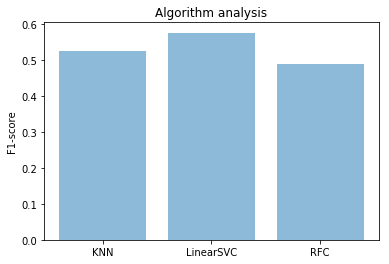

In [225]:
# seed = 7

# rng = np.random.RandomState(2)
# # linearly_separable = (X, y)

# X_entire = np.vstack((X_train,X_test))
# y_entire = np.append(y_train,y_test)
# h = .02
# # datasets = [make_moons(noise=0.3, random_state=0),
# #             make_circles(noise=0.2, factor=0.5, random_state=1),
# #             linearly_separable
# #             ]

# # figure = plt.figure(figsize=(27, 9))
# # i = 1
# # # iterate over datasets
# # for ds_cnt, ds in enumerate(datasets):

#     # iterate over classifiers
# res = []
# for name, clf in zip(names, classifiers):
# #         ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
#         pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
#                             clf)
#         pipeline.fit(X_train, y_train)
#         y_pred_bal = pipeline.predict(X_test)
        
#         print(classification_report_imbalanced(y_test, y_pred_bal))
#         scoring = 'accuracy'
#         kfold = model_selection.KFold(n_splits=10, random_state=seed)
#         cv_results = model_selection.cross_val_score(clf, X_entire, y_entire, cv=kfold, scoring=scoring)
#         res.append(cv_results)
#         msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
#         print(msg)
# fig = plt.figure()
# fig.suptitle('Algorithm Comparison')
# ax = fig.add_subplot(111)
# plt.boxplot(res)
# ax.set_xticklabels(names)
# plt.show()



In [219]:
res

[0.5758210870185403, 0.5258081842584328, 0.4885565032322532]

In [220]:
names

['LinearSVC', 'KNN', 'RFC']

In [227]:

pipeline = pl.make_pipeline(os.SMOTE(random_state=RANDOM_STATE),
                            AdaBoostClassifier( DecisionTreeClassifier(min_samples_split=4,
                                                           class_weight="balanced",
                                                           random_state=RANDOM_STATE), n_estimators=300, 
                                               learning_rate=1.5, algorithm="SAMME"))

                            
pipeline.fit(X_train, y_train)

y_pred_bal = pipeline.predict(X_test)

# Show the classification report
print(classification_report_imbalanced(y_test, y_pred_bal))
f1 = f1_score(y_test, y_pred_bal)  
res.append(f1)
names.append("Adaboost")

                   pre       rec       spe        f1       geo       iba       sup

          0       0.81      0.91      0.20      0.86      0.43      0.20     31173
          1       0.36      0.20      0.91      0.26      0.43      0.17      8078

avg / total       0.72      0.76      0.35      0.73      0.43      0.19     39251



In [228]:
res

[0.5758210870185403,
 0.5258081842584328,
 0.4885565032322532,
 0.5585923049396119]

In [229]:
names

['LinearSVC', 'KNN', 'RFC', 'Adaboost']

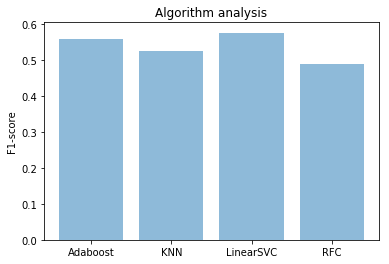

In [230]:
plt.bar(names, res,  align='center', alpha=0.5)
plt.ylabel('F1-score')
plt.title('Algorithm analysis')
 
plt.show()